In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:
# INDIR="/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat"
# COUNT_INDIR="/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
# OUTDIR= "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/clones_dendro"
# #N_DONORS=4
# DONOR=0
# var_type="init"
#INDIR=""
#sample_names="Control,Flt3l" #"Control,Flt3l,Input"

# INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# OUTDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

INDIR = "/data/Mito_Trace/output/pipeline/v02/TcellDupi_may17_2021/MTblacklist//data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
OUTDIR = "/data/Mito_Trace/output/pipeline/v02/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones/"
DONOR = 0



In [3]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

fig_utils from mplh
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
out_f = join(OUTDIR, f"donor{DONOR}")


## Load cluster results and plot dendrograms

In [6]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


In [7]:
print(AF_df.shape)
AF_df.head()

(248, 6746)


,AAACGAAAGGCTCCTG-1_pre,AAACGAAAGTGAATAC-1_pre,AAACGAAAGTGTCACT-1_pre,AAACGAACATAGGCGA-1_pre,AAACGAAGTTAACTCG-1_pre,AAACTCGAGTGTCACT-1_pre,AAACTCGCAAAGGTCG-1_pre,AAACTCGCACAAACGG-1_pre,AAACTCGCATTTGTTC-1_pre,AAACTCGGTGCCAAGA-1_pre,...,TTTGGTTGTGGAAAGA-1_post,TTTGGTTTCGGATAGG-1_post,TTTGTGTAGTGGTGTG-1_post,TTTGTGTCAAGTCCTA-1_post,TTTGTGTGTAGCATGG-1_post,TTTGTGTGTATCTGCA-1_post,TTTGTGTGTCCCTTTG-1_post,TTTGTGTTCAAAGTAG-1_post,TTTGTGTTCGGATGTT-1_post,TTTGTGTTCTTGCGCT-1_post
Variant,,,,,,,,,,,,,,,,,,,,,
1040C,0.0,0.0,0.0,0.000000,0.010989,0.0,0.0,0.019417,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
10634C,0.0,0.0,0.0,0.009346,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
10646T,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1082G,0.0,0.0,0.0,0.000000,0.083333,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.027397,0.0,0.0,0.0,0.0,0.0,0.0
10912A,0.0,0.0,0.0,0.009709,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(DP_df.shape)
DP_df.head()

(248, 6746)


,AAACGAAAGGCTCCTG-1_pre,AAACGAAAGTGAATAC-1_pre,AAACGAAAGTGTCACT-1_pre,AAACGAACATAGGCGA-1_pre,AAACGAAGTTAACTCG-1_pre,AAACTCGAGTGTCACT-1_pre,AAACTCGCAAAGGTCG-1_pre,AAACTCGCACAAACGG-1_pre,AAACTCGCATTTGTTC-1_pre,AAACTCGGTGCCAAGA-1_pre,...,TTTGGTTGTGGAAAGA-1_post,TTTGGTTTCGGATAGG-1_post,TTTGTGTAGTGGTGTG-1_post,TTTGTGTCAAGTCCTA-1_post,TTTGTGTGTAGCATGG-1_post,TTTGTGTGTATCTGCA-1_post,TTTGTGTGTCCCTTTG-1_post,TTTGTGTTCAAAGTAG-1_post,TTTGTGTTCGGATGTT-1_post,TTTGTGTTCTTGCGCT-1_post
Variant,,,,,,,,,,,,,,,,,,,,,
1040C,60,70,45,107,182,84,81,103,15,145,...,32,69,40,70,35,81,33,102,78,61
10634C,101,55,81,214,247,93,198,114,46,198,...,38,64,52,123,59,101,82,124,72,109
10646T,85,49,79,196,215,110,223,115,55,179,...,39,56,56,115,58,88,55,127,71,95
1082G,64,69,80,104,144,78,103,132,21,140,...,31,70,46,73,45,68,48,107,71,52
10912A,66,51,57,206,138,125,75,122,40,116,...,41,73,57,83,54,78,52,105,55,68


In [9]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]
curr_labels

,ID,lineage,donor,condition
0,AAAGGATGTCTGGGAA-1_pre,0,0,pre
1,AACAGTCGTCAGAAAT-1_pre,0,0,pre
2,AACCTTTCATATTGGC-1_pre,0,0,pre
3,AACGAGGAGTATACCC-1_pre,0,0,pre
4,AAGATAGCAAGGTTCT-1_pre,0,0,pre
...,...,...,...,...
6741,TCGCCTAGTGCAAGCA-1_pre,47,0,pre
6742,CCTTAATAGTTCCCGG-1_post,47,0,post
6743,TCAATTCTCGACTGGC-1_pre,48,0,pre
6744,CCGTAGGGTTCTTTGT-1_post,48,0,post


In [10]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

In [11]:
from src.utils import utils  as ut

In [12]:
sizes = pd.DataFrame(curr_labels.groupby(["lineage"]).size()).rename({0:"size"},axis=1)

sizes_conds = pd.DataFrame(curr_labels.groupby(["lineage","condition"]).size()).reset_index().rename({0:"size"},axis=1)
sizes = pd.concat((sizes,sizes_conds.pivot(index="lineage", columns="condition", values="size")), axis=1)
sizes

sizes, anno_labels, anno_lut = ut.get_continuous_colors(sizes, col="size")

sizes

,size,post,pre,size_map
lineage,,,,
0,455,283,172,"[0.9060502442435664, 0.8870126653211716, 0.970..."
1,299,207,92,"[0.8902261930108095, 0.8695762436697965, 0.965..."
2,265,181,84,"[0.8742117878353144, 0.852304919932856, 0.9587..."
3,252,135,117,"[0.8580173773187255, 0.8351942226865564, 0.952..."
4,239,174,65,"[0.8416533511495786, 0.8182396184431664, 0.945..."
5,235,62,173,"[0.8251301367421127, 0.8014365131963014, 0.937..."
6,215,135,80,"[0.8042682011277733, 0.7806385831110828, 0.927..."
7,213,126,87,"[0.7874251109228274, 0.7641592509201381, 0.919..."
8,206,182,24,"[0.7704569413847178, 0.7478160881714617, 0.910..."


# Barcodes not grouping by condition

In [13]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]

#mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=nlog2(DP_df))
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
anno_dp = mean_dp.reset_index()[["lineage"]]
mean_dp = mean_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
mean_af  

Variant,1040C,10634C,10646T,1082G,10912A,1095C,11123A,11137C,11175C,11204A,...,9531G,954G,9590T,9640T,9658G,971C,9750A,9823A,983T,9861G
lineage,,,,,,,,,,,,,,,,,,,,,
0,0.001565,0.001495,0.000430,0.001035,0.000769,0.000507,0.001180,0.001307,0.000927,0.001594,...,0.011337,0.003351,0.001713,0.000924,0.001425,0.001362,0.001039,0.001256,0.001477,0.000898
1,0.001356,0.002360,0.000000,0.001020,0.000851,0.000465,0.000378,0.000745,0.000690,0.001141,...,0.004823,0.001478,0.000975,0.000689,0.001069,0.000702,0.000382,0.001090,0.000745,0.000877
2,0.002285,0.001402,0.000057,0.004530,0.000711,0.000448,0.000707,0.001831,0.000628,0.001641,...,0.005026,0.002290,0.001998,0.001205,0.000520,0.001159,0.000985,0.001086,0.002048,0.001429
3,0.003831,0.001049,0.000000,0.000285,0.000841,0.000757,0.002132,0.001718,0.000243,0.001663,...,0.001864,0.002092,0.001794,0.001251,0.001414,0.001031,0.001102,0.001279,0.001166,0.001597
4,0.003271,0.000663,0.000597,0.001076,0.000556,0.000609,0.000910,0.002172,0.000897,0.001523,...,0.011523,0.002931,0.001675,0.001653,0.001485,0.002093,0.001296,0.001246,0.000761,0.001318
5,0.003425,0.001470,0.000387,0.005306,0.001483,0.000723,0.001394,0.001583,0.001037,0.002290,...,0.001049,0.002678,0.002286,0.001390,0.000879,0.002063,0.002219,0.001840,0.001960,0.001854
6,0.001413,0.001148,0.000000,0.000537,0.001319,0.000114,0.000763,0.001612,0.000991,0.001742,...,0.005462,0.002688,0.001449,0.001848,0.001164,0.000674,0.000745,0.000625,0.001581,0.000555
7,0.002084,0.001016,0.000125,0.000106,0.001453,0.000479,0.001049,0.000816,0.000785,0.001731,...,0.002018,0.001411,0.001559,0.002255,0.001555,0.001493,0.001478,0.000661,0.001726,0.001463
8,0.003472,0.001548,0.000431,0.001267,0.000731,0.000774,0.001492,0.001889,0.001218,0.002130,...,0.033869,0.002664,0.001225,0.000667,0.001284,0.001711,0.000832,0.000590,0.000432,0.001132


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


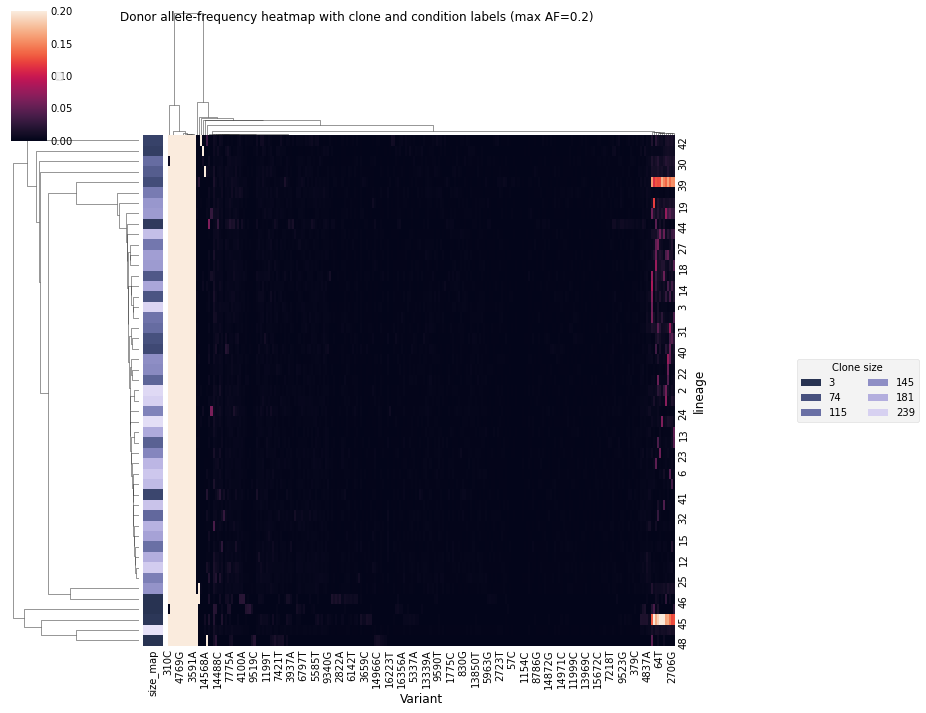

In [14]:
%matplotlib inline
################
## Plotting
## Plot average of each clone MT vaf and the corresponding depth
################
## 1.
g = sns.clustermap(mean_af,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
#plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gcf().transFigure, loc='center right')
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(out_f+".NoCondition.clust.max2.AF.png")


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


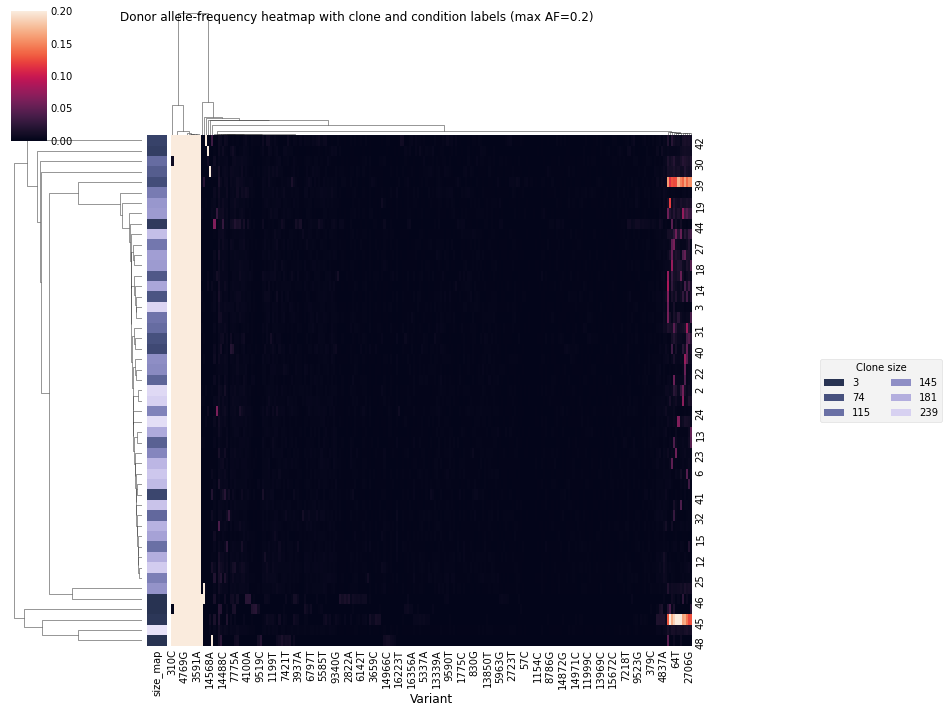

In [15]:
%matplotlib inline
## 3.
g = sns.clustermap(na_concat,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
# g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)

ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)

plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(out_f+".NoCondition.na.clust.max2.AF.png",to_pdf=False)


dat_type {'lineage': 'categorical'}
categorical


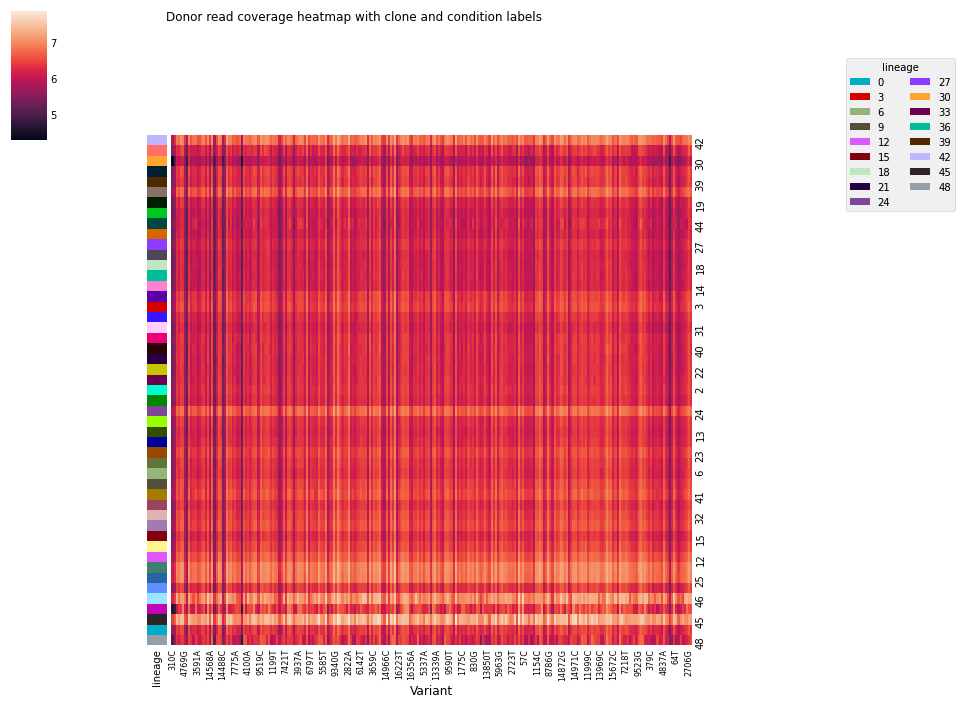

In [16]:

# inds = g.dendrogram_row.dendrogram["leaves"]
# cols = g.dendrogram_col.dendrogram["leaves"]
# g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# plt.savefig(out_f+".NoCondition.raw.clust.DP.png")#, f=g1d.figure)


# g1 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True)
# g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# fu.helper_save(out_f+".NoCondition.raw.clust.AF.png")#, f=g1.figure)

# inds = g1.dendrogram_row.dendrogram["leaves"]
# cols = g1.dendrogram_col.dendrogram["leaves"]
# g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# fu.helper_save(out_f+".NoCondition.raw.clust.DP.png")#, f=g1d.figure)


# ## 2.
# g2 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
# fu.helper_save(out_f+".NoCondition.raw.clust.max4.AF.png")
# inds = g2.dendrogram_row.dendrogram["leaves"]
# cols = g2.dendrogram_col.dendrogram["leaves"]
# ch.plot_cluster(mean_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
#                         row_meta=anno_dp.iloc[inds])
# fu.helper_save(out_f+".NoCondition.raw.clust.max4.DP.png")




#plt.savefig(out_f+".NoCondition.na.clust.max2.AF.png")

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds] )
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(out_f+".NoCondition.na.clust.max2.DP.png",to_pdf=False)




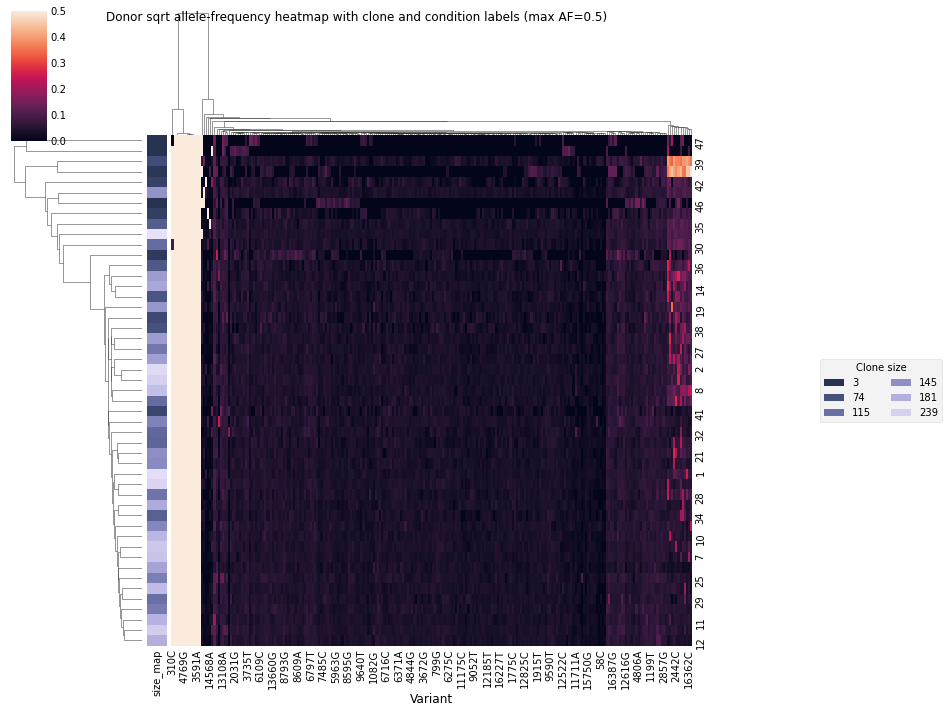

In [17]:
# ## 4.
g = sns.clustermap(np.sqrt(na_concat), 
                   row_cluster=True, col_cluster=True, vmax=0.5, vmin=0, row_colors=sizes[["size_map"]])

# g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)

plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(out_f+".NoCondition.na.max5.AF.png",to_pdf=False)


## Run for median

In [18]:
median_out_f = out_f + "_MEDIAN"

median_af = curr_labels.groupby(["lineage"]).apply(calc_median, af=AF_df)
anno = median_af.reset_index()[["lineage"]]

#median_dp = curr_labels.groupby(["lineage"]).apply(calc_median, af=nlog2(DP_df))
median_dp = curr_labels.groupby(["lineage"]).apply(calc_median, af=np.log2(DP_df+1))
anno_dp = median_dp.reset_index()[["lineage"]]
median_dp = median_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_median_af = na_cells.groupby("condition").apply(calc_median, af=AF_df)

if not (na_median_af.shape[0] == 0):
    print('na shape', na_median_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_median_af.index)})), ignore_index=True)
    na_concat = pd.concat((median_af.reset_index(drop=True), na_median_af.reset_index(drop=True)), ignore_index=True)
    na_median_dp = na_cells.groupby("condition").apply(calc_median, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((median_dp, na_median_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = median_af.reset_index(drop=True)
    na_dp_concat = median_dp
      

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dat_type {'lineage': 'categorical'}
categorical


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


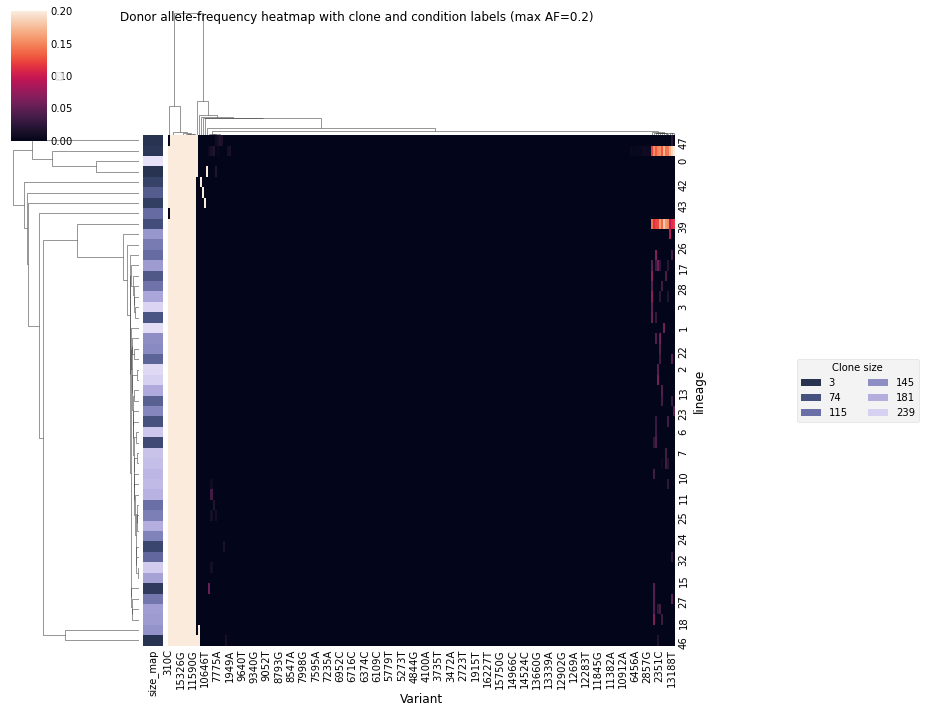

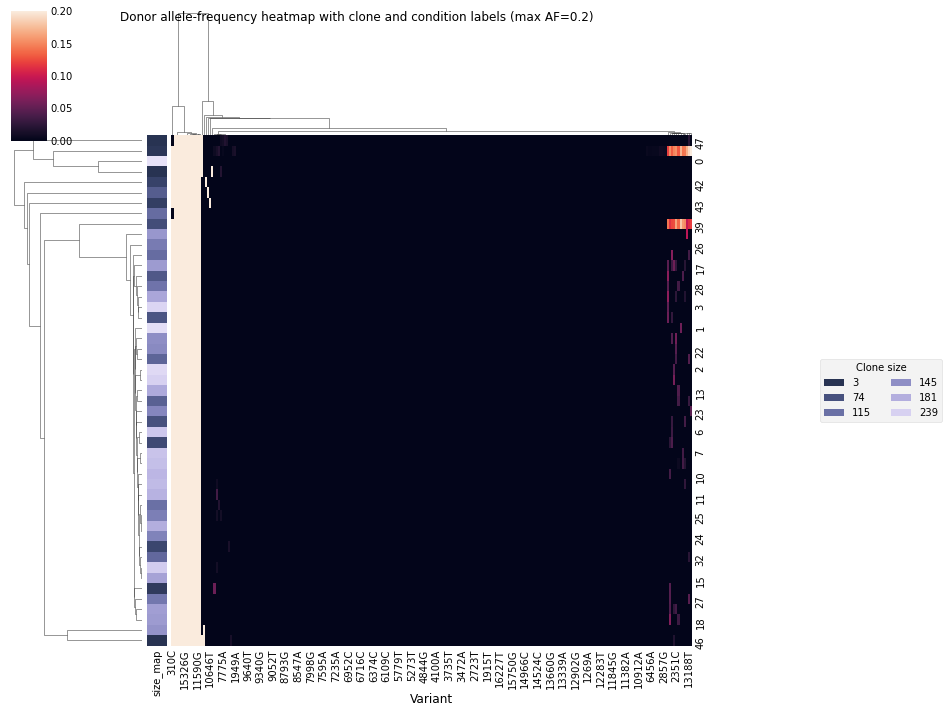

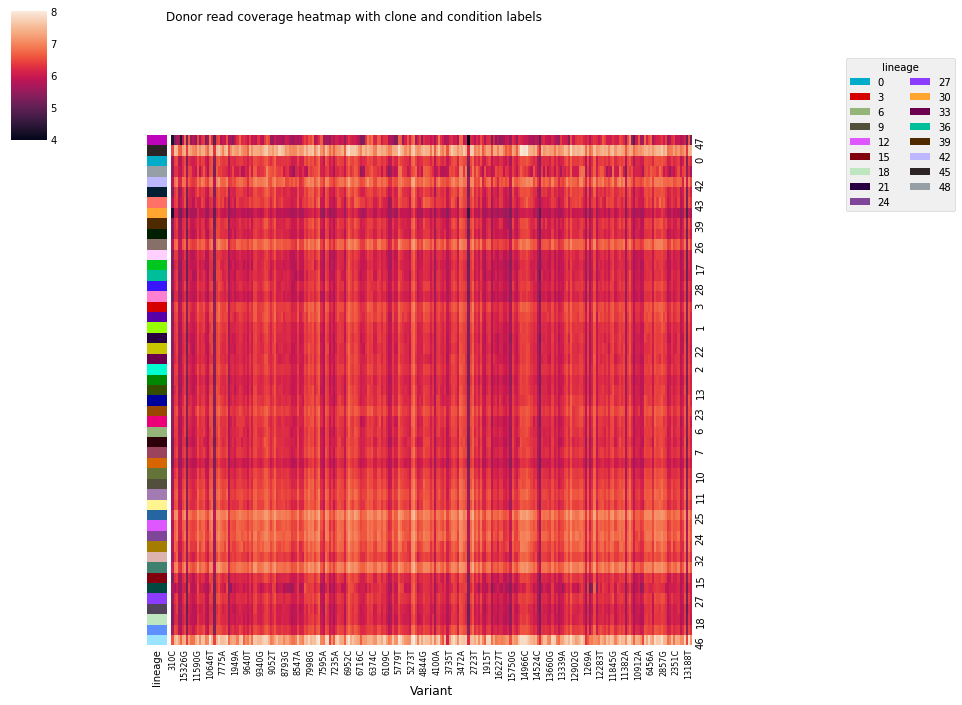

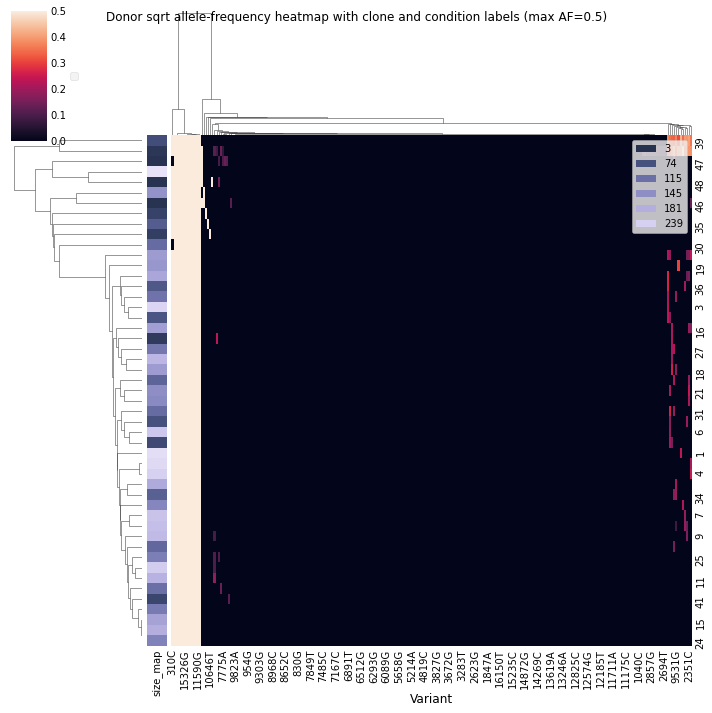

In [19]:
%matplotlib inline
################
## Plotting
## Plot median of each clone MT vaf and the corresponding depth
################
## 1.
g = sns.clustermap(median_af,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
#plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gcf().transFigure, loc='center right')
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
fu.helper_save(median_out_f+".NoCondition.clust.max2.AF.png",to_pdf=False)


## 3.
g = sns.clustermap(na_concat,
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0, row_colors=sizes[["size_map"]])
# g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)

ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)
g.ax_heatmap.legend(title="Clone size",bbox_to_anchor=(1.5, 0.5), 
                    ncol=2, loc="center right", borderaxespad=1)
#plt.savefig(median_out_f+".NoCondition.na.clust.max2.AF.png")

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
fu.helper_save(median_out_f+".NoCondition.na.clust.max2.AF.png")

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds], )
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(median_out_f+".NoCondition.na.clust.max2.DP.png",to_pdf=False)



# ## 4.
g = sns.clustermap(np.sqrt(na_concat), 
                   row_cluster=True, col_cluster=True, vmax=0.5, vmin=0, row_colors=sizes[["size_map"]])
ut.plot_continuous_legend(g, anno_labels,anno_lut,n_labs=6)

# g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
#                     to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(median_out_f+".NoCondition.na.max5.AF.png",to_pdf=False)


## Separate conditions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical
dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical
dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical
dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical
dat_type {'lineage': 'categorical', 'condition': 'categorical'}
categorical
categorical


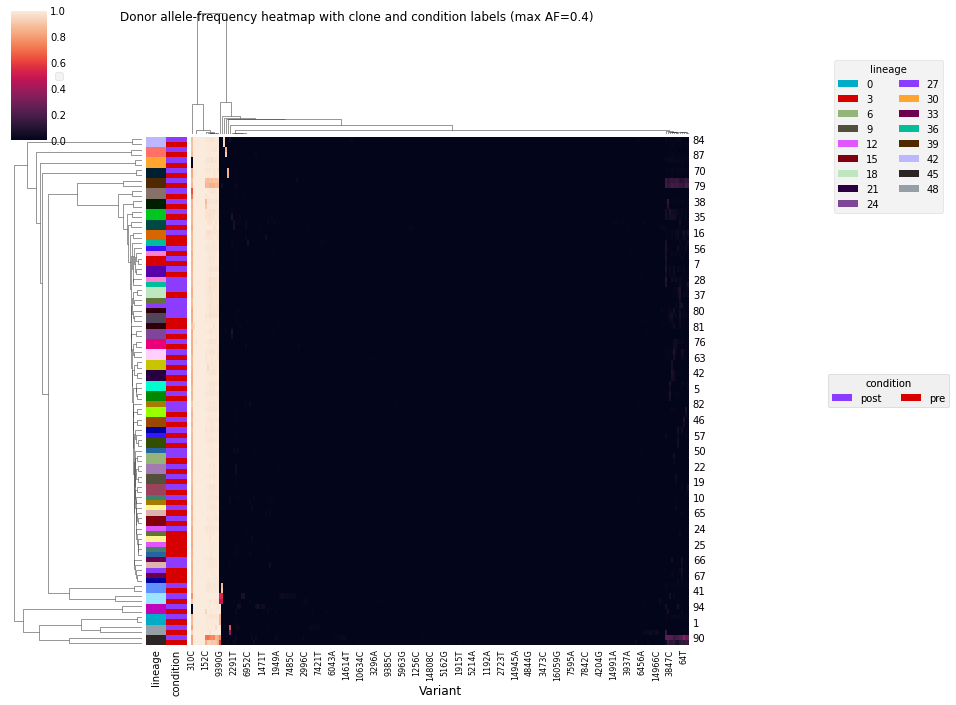

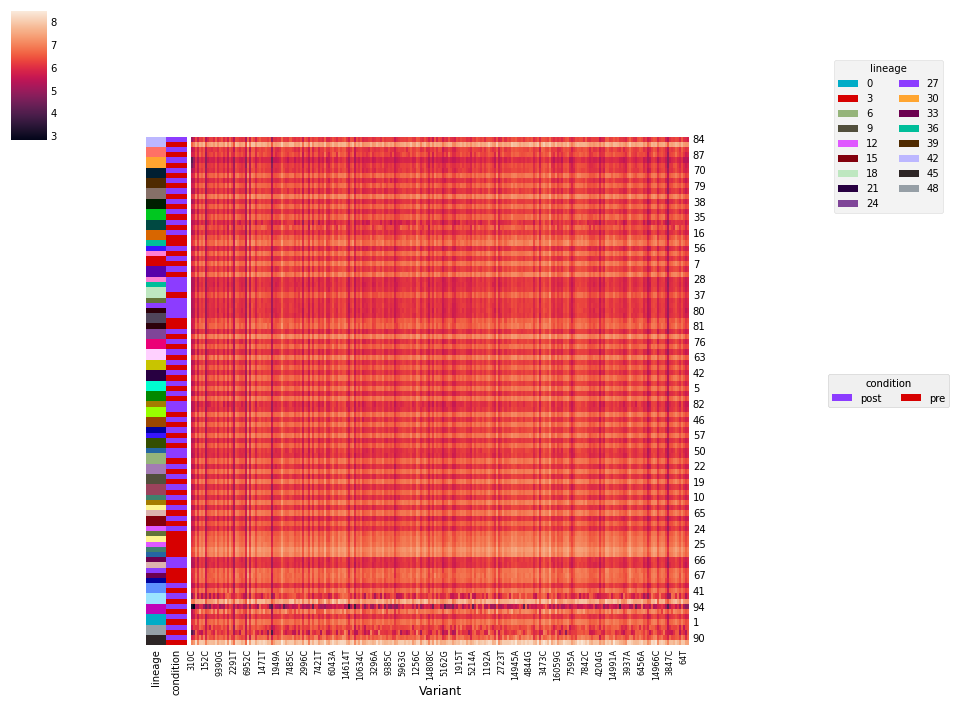

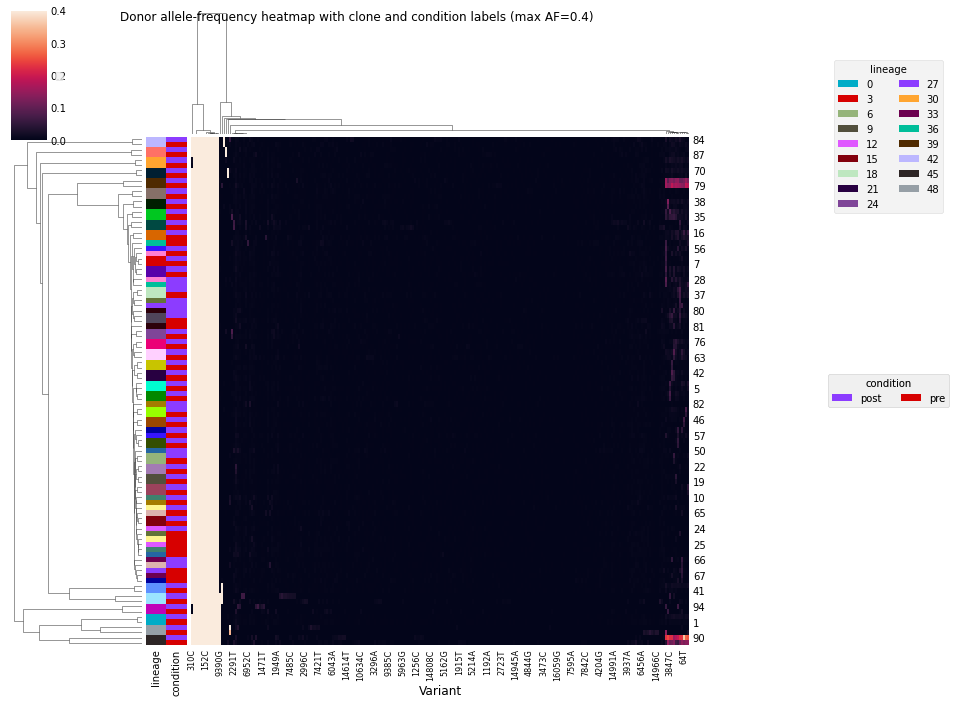

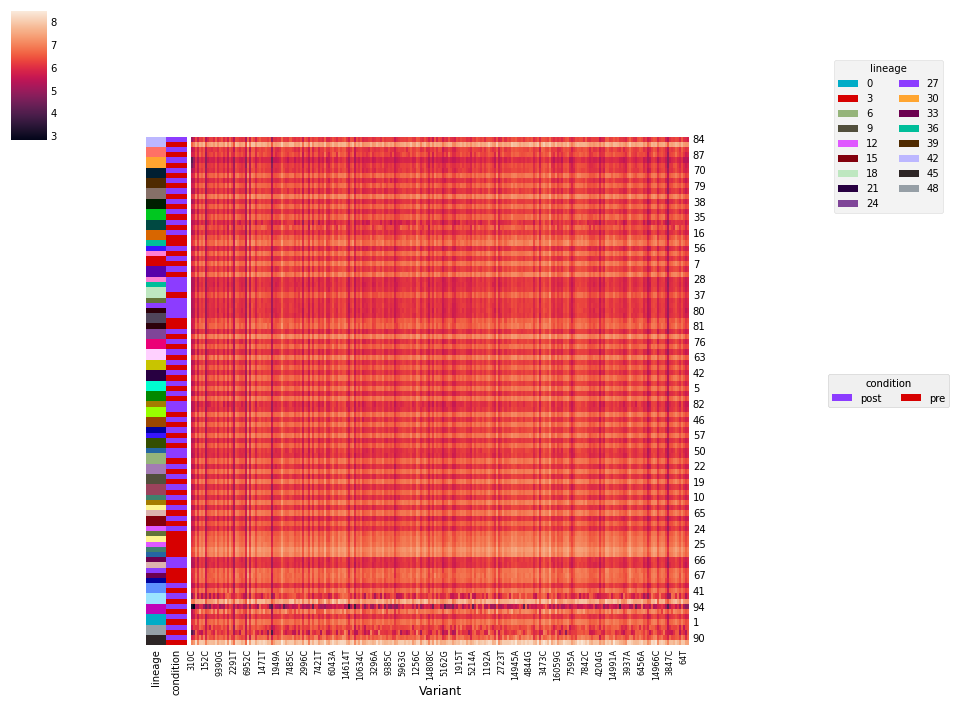

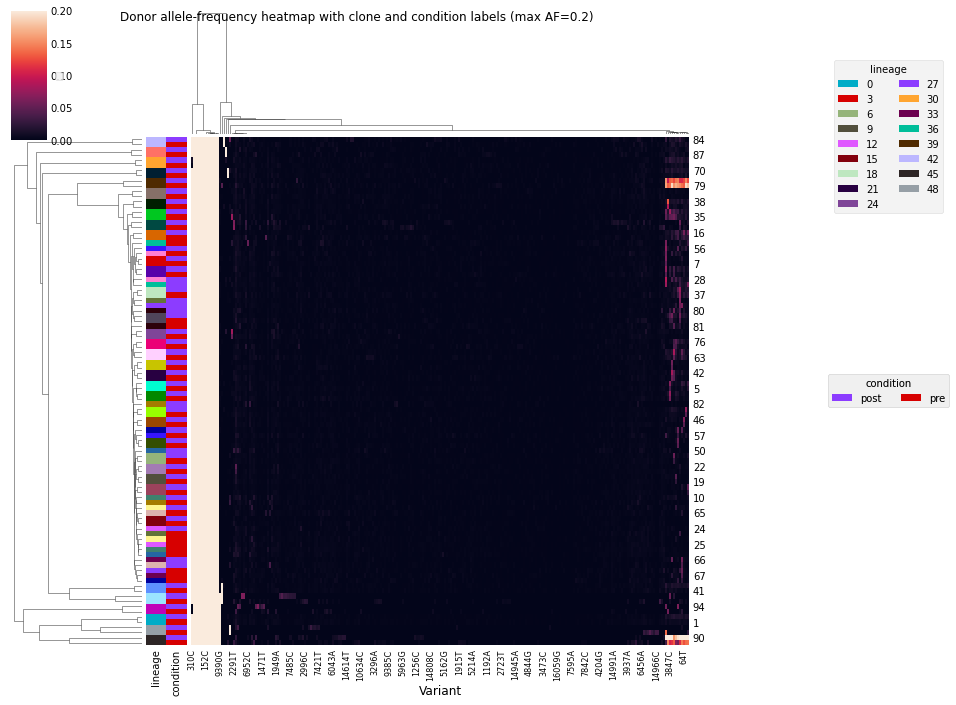

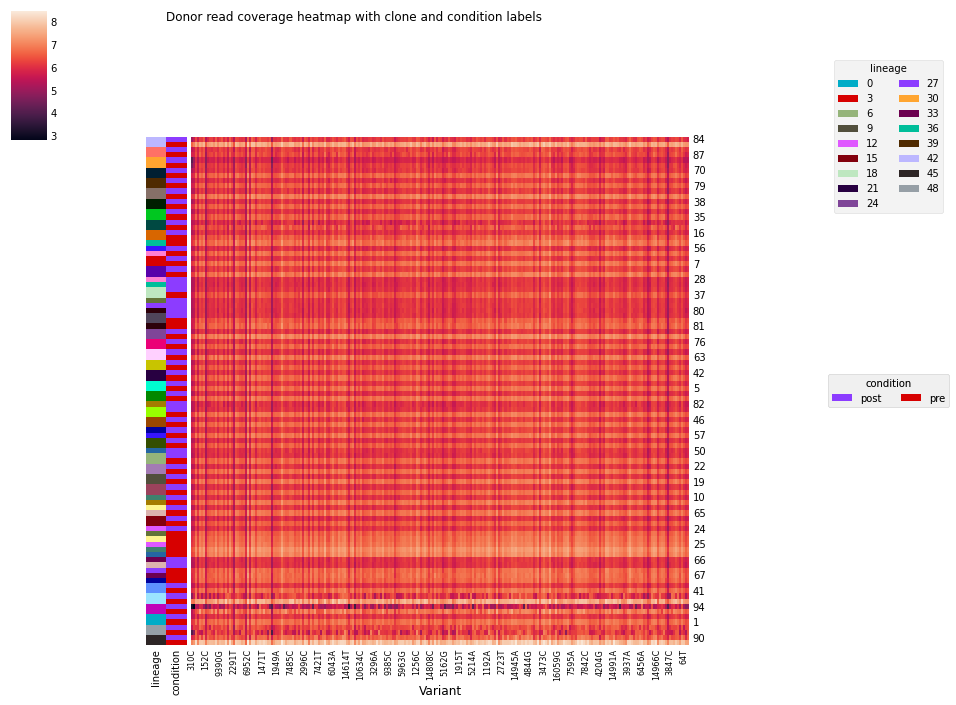

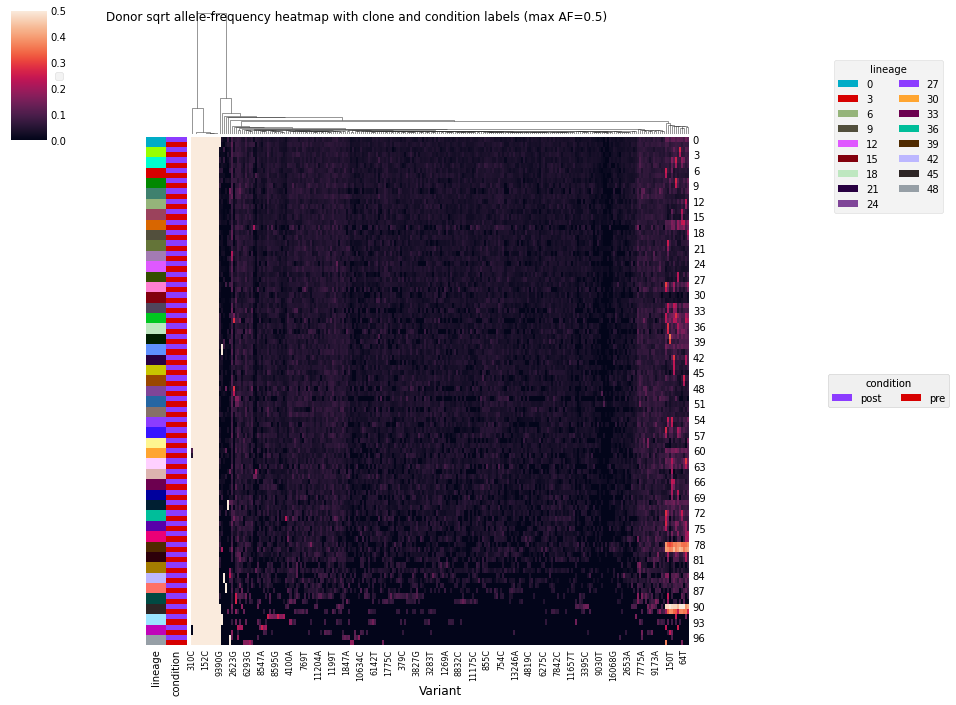

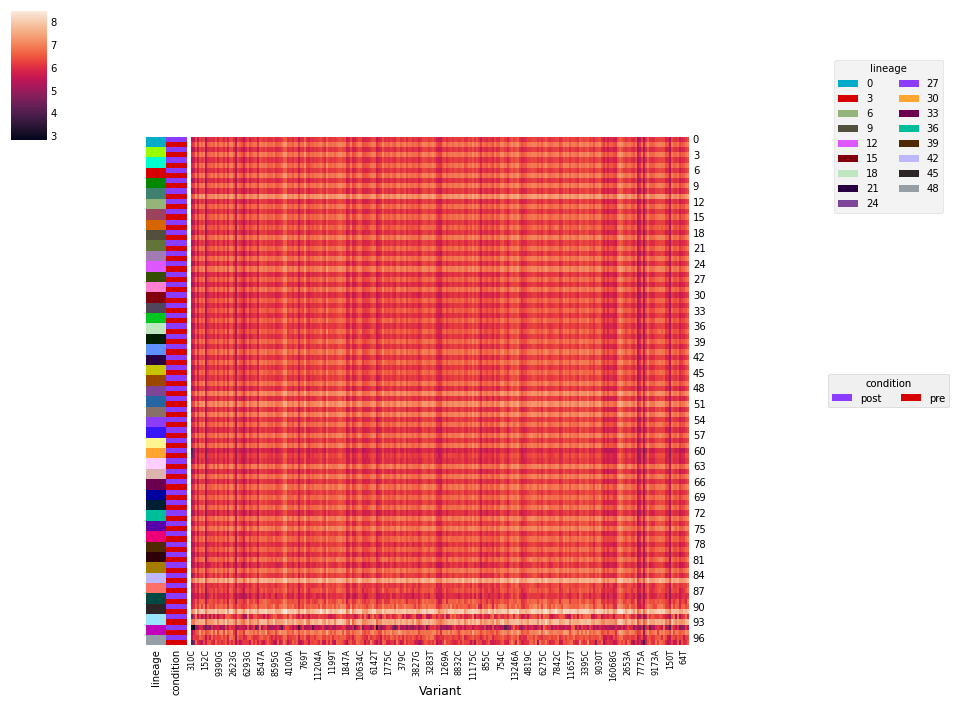

In [20]:
mean_af = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage", "condition"]]

#mean_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=nlog2(DP_df))
mean_dp = curr_labels.groupby(["lineage", "condition"]).apply(calc_mean, af=np.log2(DP_df+1))
anno_dp = mean_dp.reset_index()[["lineage", "condition"]]
mean_dp = mean_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index), "condition":na_mean_af.index})), 
                        ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     

################
## Plotting
################
## 1.
g1 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True)
g1.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fu.helper_save(out_f+".raw.clust.AF.png")#, f=g1.figure)

inds = g1.dendrogram_row.dendrogram["leaves"]
cols = g1.dendrogram_col.dendrogram["leaves"]
g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".raw.clust.DP.png")#, f=g1d.figure)


# ## 2.
g2 = ch.plot_cluster((mean_af.reset_index(drop=True)), row_meta=anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.4, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g2.figure.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.4)")
fu.helper_save(out_f+".raw.clust.max4.AF.png")
inds = g2.dendrogram_row.dendrogram["leaves"]
cols = g2.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(mean_dp.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=anno_dp.iloc[inds])
fu.helper_save(out_f+".raw.clust.max4.DP.png")


## 3.
g = ch.plot_cluster(na_concat, row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=True, to_col_clust=True, vmax=0.2, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
fu.helper_save(out_f+".na.clust.max2.AF.png")

inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[inds,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
plt.suptitle("Donor read coverage heatmap with clone and condition labels ")
fu.helper_save(out_f+".na.clust.max2.DP.png")


# ## 4.
g = ch.plot_cluster(np.sqrt(na_concat), row_meta=na_anno, #curr_labels[["condition", "lineage"]], 
                    to_row_clust=False, to_col_clust=True, vmax=0.5, vmin=0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(out_f+".na.max5.AF.png")
#inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
ch.plot_cluster(na_dp_concat.iloc[:,cols], to_row_clust=False, to_col_clust=False, 
                        row_meta=na_anno.iloc[inds])
fu.helper_save(out_f+".na.max5.DP.png")

#plt.close('all')